

 **Tomato Blight Project**





## Imports

In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import cv2

print("Tensorflow version",tf.__version__)
print("Numpy version",np.__version__)
print("Matplolib version",tf.__version__)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
BASE_DIR = Path().resolve()
print(BASE_DIR)


COLAB = True
processed_data_folder =""
if not COLAB:
    BASE_DIR = "E:/BlightProject_CNN"

Tensorflow version 2.9.2
Numpy version 1.21.6
Matplolib version 2.9.2
/content


In [ ]:
import urllib.request
import zipfile
import os


if COLAB:
    import urllib.request
    import zipfile
    import os



    class ProcessingUtils():
          
        def zipfileDownload(self,url, ref_directory,file_name):
            '''
            Download zipfile containining image data
            url: link to zipfile
            file_name: name to save the file to
            '''
            print("Starting file download ...\n")
            file_name = os.path.join(ref_directory,file_name)
            res=urllib.request.urlretrieve(url,file_name)
            if res:
                print("Completed downloading ", res[0])
                return file_name
            print(f"Unsuccessful download!\n From link {url} to file {file_name}")
            return False

        def readZipFile(self,file_name,target_folder,ref_directory):
            '''
            read zipfile contents into a folder
            '''
            file_name = os.path.join(ref_directory,file_name)
            print(f"Starting {file_name} file read")
            zip_ref = zipfile.ZipFile(file_name,'r')
            target_folder = os.path.join(ref_directory,target_folder)
            zip_ref.extractall(path=target_folder)
            zip_ref.close()
            print(f"Completed {file_name} file read into {target_folder}")
            return target_folder

        def saveModel(self,ref_directory,model):
            '''
            Save tensorflow model to directory "saved_models"
            model: receives tensorflow model as input
            '''
            save_model_folder = os.path.join(ref_directory,"saved_models")
            next_version=len(os.listdir(save_model_folder))+1
            name = f"saved_models/tomatoe_blight_model_version_{next_version}.h5"
            print(os.path.join(ref_directory,name))
            model.save(name)
            return

        def getLoadModel(self,ref_directory):
            '''
            Loads saved tensorflow model from directory "saved_models"
            model: receives tensorflow model as input
            returns a tensorflow model
            '''
            from tensorflow.keras.models import load_model
            f = os.path.join(ref_directory,"/content/saved_models")
            print(f)
            latest_version =len(os.listdir(f))
            print(latest_version)
            name = f"tomatoe_blight_model_version_{latest_version}.h5"
            loaded_model=load_model(name)
            return loaded_model
        
        
        def image_resize(self,ref_directory,raw_data_path):
            
            f = os.path.join(ref_directory,raw_data_path)
            
            directories = os.listdir(f)
            # print(directories)
            resized_directory = os.path.join(ref_directory,'resized/')
            print("Resezed images path is: ", resized_directory)
            for directory in directories:
                directory_path = f"{f}/{directory}"
                print(f"At: {directory_path}")
                for file in os.listdir(directory_path):
                    # print(file)
                    file_path = f"{directory_path}/{file}"
                    # print(file_path)
                    img = cv2.imread(file_path)
                    # print(img)
                    scale_percent = 15 # percent of original size
                    # width = int(img.shape[1] * scale_percent / 100)
                    # height = int(img.shape[0] * scale_percent / 100)
                    width = 300
                    height = 400
                    dim = (width, height) # width, height
                    
                    # Create resized image using the calculated dimensions
                    resized_image = cv2.resize(img, dim,interpolation=cv2.INTER_AREA)
                
                    # Save the image in Output Folder
                    save_to = resized_directory+directory+'/resized_'+str(width)+'_'+str(height)+file
                    print(save_to)
                    cv2.imwrite(resized_directory+directory+'/resized_'+str(width)+'_'+str(height)+file,resized_image)
   
        
else:
     from utils import ProcessingUtils 
 
    
    
utilob = ProcessingUtils()

## Load google drive in Google Collab

In [ ]:
if COLAB:
  from google.colab import drive
  drive.mount('/content/gdrive')

  path_drive = '/content/gdrive/MyDrive/'

Mounted at /content/gdrive


## Get raw zipfile data

In [ ]:
raw_link =""
if COLAB:
    raw_link =path_drive + "data_3.zip"
else:
    raw_link = "https://drive.google.com/file/d/1l5gzGnNt6QSBS42KjCTFI6KyASJDp_Kd/view?usp=share_link"
    


file_name = "raw-blight-healthy-or-unhealthy-segmented-days"

raw_file_dir = file_name
print(raw_link)

if not COLAB:
  raw_link = utilob.zipfileDownload(raw_link,BASE_DIR,file_name=raw_file_dir)

/content/gdrive/MyDrive/data_3.zip


### read raw data zipfile

In [ ]:
raw_data_folder =""
if COLAB:
  raw_data_folder = utilob.readZipFile(raw_link,"",BASE_DIR)
else:
  raw_data_folder = utilob.readZipFile(raw_link,"raw_data",BASE_DIR)


Starting /content/gdrive/MyDrive/data_3.zip file read
Completed /content/gdrive/MyDrive/data_3.zip file read into /content/


### resize raw data

In [ ]:
folder_with_data = "/data_3"
raw_data_folder_use = raw_data_folder + folder_with_data
print(raw_data_folder_use)

utilob.image_resize(BASE_DIR,raw_data_folder_use)

/content//data_3
Resezed images path is:  /content/resized/
At: /content//data_3/healthy leaves
/content/resized/healthy leaves/resized_300_400DSC_0269_939.JPG
/content/resized/healthy leaves/resized_300_400DSC_0146.JPG
/content/resized/healthy leaves/resized_300_400DSC_0310_980.JPG
/content/resized/healthy leaves/resized_300_400DSC_0157_827.JPG
/content/resized/healthy leaves/resized_300_400DSC_0148.JPG
/content/resized/healthy leaves/resized_300_400DSC_0178_848.JPG
/content/resized/healthy leaves/resized_300_400DSC_0426.JPG
/content/resized/healthy leaves/resized_300_400DSC_0253_923.JPG
/content/resized/healthy leaves/resized_300_400DSC_0441_1111.JPG
/content/resized/healthy leaves/resized_300_400DSC_0381_1051.JPG
/content/resized/healthy leaves/resized_300_400DSC_0309.JPG
/content/resized/healthy leaves/resized_300_400DSC_0147.JPG
/content/resized/healthy leaves/resized_300_400DSC_0264_934.JPG
/content/resized/healthy leaves/resized_300_400DSC_0320_990.JPG
/content/resized/healthy l

### Get resized data from zip file

In [ ]:
# processed_link=""
# if COLAB:
#   processed_link= path_drive + "/resized.zip"
# else:
#   processed_link =  "resized.zip"

# file_name = "blight-healthy-or-unhealthy-segmented-days"
# utilob = ProcessingUtils()
# processed_file_dir = file_name
# print(processed_link)

# # if not COLAB:
# #   link = utilob.zipfileDownload(processed_link,BASE_DIR,file_name=processed_file_dir)


# if COLAB:
#   # utilob.zipfileDownload(link,file_dir)
#   data_folder = utilob.readZipFile(processed_link,"sample_data/mydata",BASE_DIR)
# else:
#   # utilob.zipfileDownload(link,BASE_DIR,file_dir)
#   data_folder = utilob.readZipFile(processed_link,"data",BASE_DIR)

# processed_data_folder += "/resized/" 


### Get resized data from folder

In [ ]:
# put resized folder path
processed_data_folder += "resized/" 

### Split Data into Train, Test, Validataion

In [ ]:

updated_path = "/content/resized/"

if COLAB:
  !pip install split-folders

import splitfolders

split_data_folder =""
if COLAB:
  split_data_folder += os.path.join(BASE_DIR,"/content/split_data")
else:
  split_data_folder += os.path.join(BASE_DIR,"split_data/")
print(split_data_folder)
print(updated_path)
splitfolders.ratio(updated_path, output=split_data_folder,
    seed=1337, ratio=(0.7, 0.1, 0.2))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/split_data
/content/resized/


Copying files: 1663 files [00:00, 7588.08 files/s]


## Load images, Image Augmentation

### ImageDataGenerator Object

In [ ]:
# ImageDataGenerator Object

DataGenerator = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40, # Rotating each image randomly up to 40 degrees left or right
 width_shift_range=0.2, # Translating the image up to 20%  horizontally
 height_shift_range=0.2, #  Translating the image up to 20% vertically 
 shear_range=0.2, # Shearing the image by up to 20%
 zoom_range=0.2, # Shearing the image by up to 20%
 horizontal_flip=True, # 
 fill_mode='nearest' # Filling in any missing pixels after a move or shear with nearest neighbors
)

In [ ]:
split_data_folder='/content/split_data/'

### training

In [ ]:

training_dir = split_data_folder +"train/"

test_dir = split_data_folder +"test/"

validation_dir = split_data_folder +"val/"

train_gen = DataGenerator

prediction_classes = ["blight infected 5-7","blight infected day 1-3","blight infected day 3-5","blight infected day 7 onwards","healthy leaves"]


train_generator = train_gen.flow_from_directory(
    training_dir,
    target_size=(300,400),
    class_mode = 'categorical',

)
print(train_generator.class_indices)


Found 2324 images belonging to 6 classes.
{'.ipynb_checkpoints': 0, 'blight infected 5-7': 1, 'blight infected day 1-3': 2, 'blight infected day 3-5': 3, 'blight infected day 7  onwards': 4, 'healthy leaves': 5}


### validation

In [ ]:
validation_gen = DataGenerator


validation_generator = validation_gen.flow_from_directory(
    validation_dir,
    target_size=(300,400),
    class_mode = 'categorical'
)
print(validation_generator.class_indices)

Found 330 images belonging to 6 classes.
{'.ipynb_checkpoints': 0, 'blight infected 5-7': 1, 'blight infected day 1-3': 2, 'blight infected day 3-5': 3, 'blight infected day 7  onwards': 4, 'healthy leaves': 5}


### test

In [ ]:
test_gen = DataGenerator

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(300,400),
    class_mode = 'categorical'
)
print(test_generator.class_indices)

Found 672 images belonging to 6 classes.
{'.ipynb_checkpoints': 0, 'blight infected 5-7': 1, 'blight infected day 1-3': 2, 'blight infected day 3-5': 3, 'blight infected day 7  onwards': 4, 'healthy leaves': 5}


## Convolution Neural Network Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape =(400,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(6, activation ="softmax")
])
model.summary()
model.build()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 398, 298, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 199, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 197, 147, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 98, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 71, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 35, 128)     

## Model compiling

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)


## Model training and validation

In [ ]:
train_history=model.fit(
    train_generator,
    epochs=100,
    validation_data= validation_generator
)

Epoch 1/250
73/73 [==============================] - 85s 1s/step - loss: 1.4850 - accuracy: 0.4131 - val_loss: 1.4236 - val_accuracy: 0.4242
Epoch 2/250
73/73 [==============================] - 71s 978ms/step - loss: 1.0853 - accuracy: 0.5478 - val_loss: 0.9449 - val_accuracy: 0.6242
Epoch 3/250
73/73 [==============================] - 71s 975ms/step - loss: 0.8311 - accuracy: 0.6282 - val_loss: 0.7364 - val_accuracy: 0.6333
Epoch 4/250
73/73 [==============================] - 71s 975ms/step - loss: 0.7657 - accuracy: 0.6360 - val_loss: 0.9252 - val_accuracy: 0.6364
Epoch 5/250
73/73 [==============================] - 69s 952ms/step - loss: 0.7436 - accuracy: 0.6381 - val_loss: 0.6840 - val_accuracy: 0.6273
Epoch 6/250
73/73 [==============================] - 71s 969ms/step - loss: 0.7410 - accuracy: 0.6545 - val_loss: 0.6905 - val_accuracy: 0.6545
Epoch 7/250
73/73 [==============================] - 72s 982ms/step - loss: 0.7275 - accuracy: 0.6545 - val_loss: 0.6662 - val_accuracy: 0.

### save model

In [ ]:
# import os
if COLAB:
  # utilob.saveModel(path_drive,model)
  utilob.saveModel(BASE_DIR,model)
else:
  utilob.saveModel(BASE_DIR,model)
# next_version=len(os.listdir("saved_models"))+1
# name = f"saved_models/tomatoe_blight_model_version_{next_version}.h5"
# model.save(name)


NameError: ignored

## History train plots

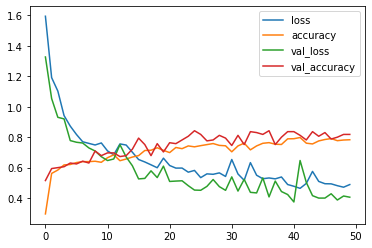

In [ ]:
# dir(train_history)
# print(train_history.params)
# print(train_history.epoch)
# train_history.history.keys()
# loss = train_history.history['loss']
# print(train_history.epoch)

legend = []
for i in train_history.history.keys():
    legend.append(i)
    data = train_history.history[i]
    plt.plot(train_history.epoch,data)
plt.legend(legend)

## Model evaluation

In [ ]:
model.evaluate(test_generator)

11/11 [==============================] - 21s 2s/step - loss: 0.4741 - accuracy: 0.7708


[0.47406983375549316, 0.7708333134651184]

## File upload for prediction

In [ ]:
if not COLAB:
    !pip install ipywidgets

In [ ]:
from ipywidgets import FileUpload
from IPython.display import display
from keras.preprocessing import image
upload = FileUpload(accept='.jpg', multiple=True)

display(upload)
# model_path = "/content/saved_models/"
# if COLAB:
#   loaded_model= utilob.getLoadModel(BASE_DIR)
# else:
#   loaded_model=utilob.getLoadModel(BASE_DIR)



loaded_model = tf.keras.models.load_model("/content/gdrive/MyDrive/model/tomatoe_blight_model_version_1 (2).h5")
            

img_path = "/content/gdrive/MyDrive/imaged /01f87f04-ff38-4aba-b7d1-587aa06e5282___RS_Erly.B 7851.JPG"
img = tf.keras.preprocessing.image.load_img(img_path, target_size = (674,450,3))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
res = loaded_model.predict(images)
print(res)

prediction_classes = ["blight infected 5-7","blight infected day 1-3","blight infected day 3-5","blight infected day 7 onwards","healthy leaves"]

result = list(res[0]).index(max(list(res[0])))

print("Predicted class: ",prediction_classes[result])
print(f"Accuracy: {list(res[0])[result]*100}% " )

FileUpload(value={}, accept='.jpg', description='Upload', multiple=True)

ValueError: ignored

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


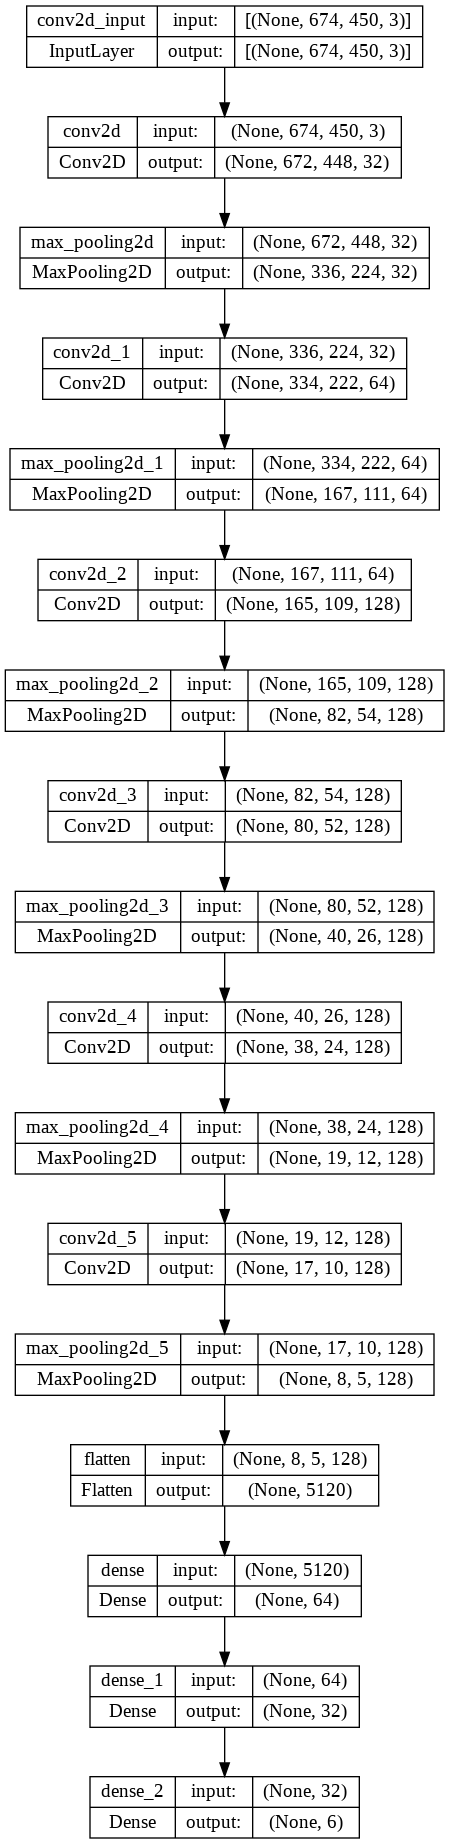

In [ ]:
!pip install pydot
tf.keras.utils.plot_model(model,'model.png',show_shapes=True)